In [31]:
import numpy as np
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

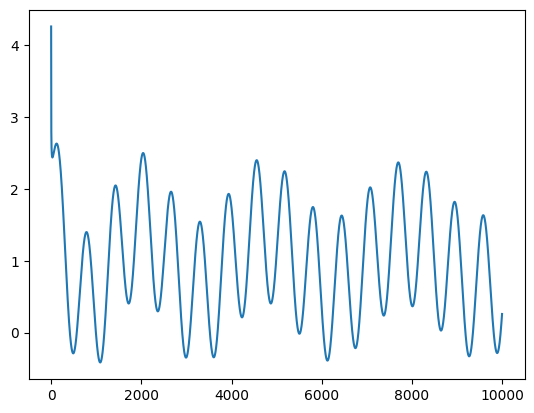

<Figure size 640x480 with 0 Axes>

In [32]:
# generate a 1d path
t = np.linspace(0, 50, 10000)
# prepend some zeros to the path
# t = np.concatenate((np.zeros(1), t))
dt = t[1]-t[0]
x = np.sin(t)**2 + np.sin(t**.8) + t
vel = np.gradient(x, dt, edge_order=2)
acc = np.gradient(vel, dt, edge_order=2)
plt.plot(vel)
plt.figure()
# lmdb = np.log(t)/10 + 1 #lambda scaling of x
# plt.plot(lmdb)

In [33]:
t.shape

(10000,)

In [34]:
# # scale x by lambda
# x_meas = x*lmdb
# plt.plot(x_meas)

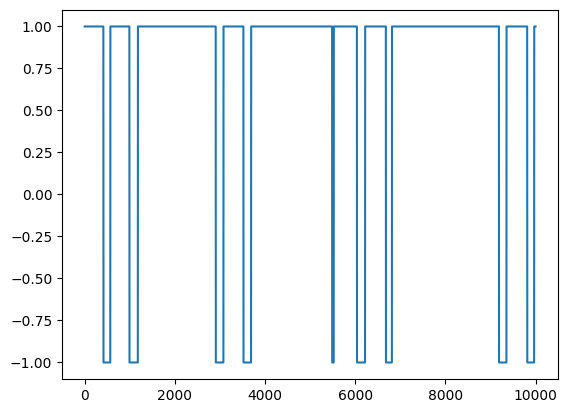

In [35]:
delta_x = np.gradient(x, 1)
# nomalize delta_x to 1 if positive, -1 if negative
delta_x_direction = delta_x/np.abs(delta_x)
plt.plot(delta_x_direction)

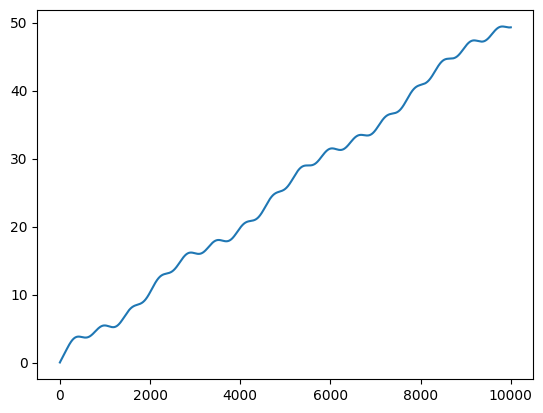

In [36]:
delta_x
# integrate delta_x
x_int = np.cumsum(delta_x)
plt.plot(x_int)

In [37]:
delta_x[-1]

0.0012717049321864238

In [47]:
# kalman filter
# state = [x,v,a,lambda]

# x state transition xk1 = xk + (v*dt)/lambda + (1/2*a*dt^2)/lambda
# v state transition vk1 = vk + a*dt/lambda
# a state transition ak1 = ak
# lambda state transition lambda_k1 = lambda_k
# state transition matrix

def get_F(state):
    F = np.array([[1, dt/state[3], (dt**2)/(2*state[3]), 0],
                  [0, 1, dt/state[3], 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return F


def nonlin_f(state):
    f = np.array([state[0] + (state[1]*dt)/state[3] + (state[2]*dt**2)/(2*state[3]),
                  state[1] + (state[2]*dt)/state[3],
                  state[2],
                  state[3]])
    return f

# measurements are
# z1 = xk/lambda
# z2 = a


def nonlin_h(state):
    h = np.array([state[0]/state[3],
                  state[2]])
    return h


def get_H(state):
    H = np.array([[1/state[3], 0, 0, -state[0]/(state[3]**2)],
                  [0, 0, 1, 0]])
    return H


# EKF
# initialize state
state = np.array([x[0], vel[0], acc[0], delta_x[0]])
# initialize covariance
P = np.eye(4)*10
# initialize measurement noise
R = np.eye(2)
# initialize process noise
Q = np.eye(4)

nonlin_h(state)

# run filter
state_hist = []
for i in range(len(x)):
    # predict
    state = nonlin_f(state)
    F = get_F(state)
    P = F @ P @ F.T + Q
    # update
    H = get_H(state)
    K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)
    z = np.array([delta_x_direction[i], acc[i]])
    state = state + K @ (z - nonlin_h(state))
    P = (np.eye(4) - K @ H) @ P
    state_hist.append(state)
state_hist[-20:], P

([array([-1.673403  ,  1.44681329,  1.59456316, -1.67106386]),
  array([-1.67587614,  1.44074877,  1.60794119, -1.67294219]),
  array([-1.67815734,  1.43453071,  1.62116812, -1.67496829]),
  array([-1.68034437,  1.42822853,  1.63424264, -1.67705002]),
  array([-1.68248124,  1.42187383,  1.64716345, -1.67914774]),
  array([-1.68458772,  1.41548111,  1.65992928, -1.68124434]),
  array([-1.68667271,  1.40905716,  1.67253887, -1.68333244]),
  array([-1.68874023,  1.40260535,  1.68499098, -1.68540887]),
  array([-1.69079212,  1.39612746,  1.69728436, -1.68747228]),
  array([-1.69282921,  1.3896246 ,  1.70941781, -1.68952211]),
  array([-1.69485192,  1.38309756,  1.72139013, -1.69155813]),
  array([-1.69686045,  1.376547  ,  1.73320013, -1.69358028]),
  array([-1.69885491,  1.3699735 ,  1.74484665, -1.69558854]),
  array([-1.70083537,  1.36337762,  1.75632854, -1.69758292]),
  array([-1.70280188,  1.35675991,  1.76764467, -1.69956346]),
  array([-1.7047545 ,  1.35012092,  1.77879391, -1.7015

In [44]:
state_hist[-1][0]/state_hist[-1][3]

0.9536004452646354

In [ ]:
# integrate acc over 7 samples
p = 0
v = 0
for i in range(int(1/dt)):
    p = p + v*dt
    v = v + acc[i]*dt
p

0.24878105278697527

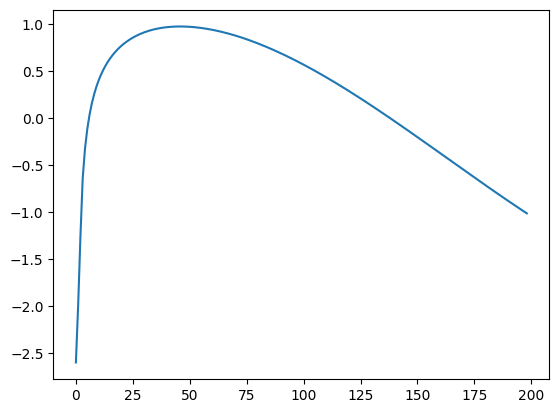

In [ ]:
plt.plot(acc[:int(1/dt)])